<a href="https://colab.research.google.com/github/Usuarioah03/Trabajo-TelecomX/blob/main/Proyecto_telecom_X_Parte_1pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

**Extracción** de datos

Descripción

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

¿Qué debes hacer?

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [3]:
import pandas as pd

# Cargar los datos directamente desde la API utilizando Python
raw_url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Convertir los datos a un DataFrame de Pandas
    df = pd.read_json(raw_url)
    print(f"DataFrame cargado exitosamente. Filas: {len(df)}, Columnas: {len(df.columns)}")
except Exception as e:
    print(f"Error al cargar el JSON: {e}")
    print("Verifica la URL y tu conexión a internet.")

DataFrame cargado exitosamente. Filas: 7267, Columnas: 6


#🔧 Transformación

Conozce el conjunto de datos

Descripción

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

In [4]:
# Exploración de las columnas del dataset
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(df.columns.tolist())
print("\n" + "="*50 + "\n")
print(df.head())
print("\n" + "="*50 + "\n")

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


   customerID Churn                                                                                      customer                                            phone                                                                                                                                                                           internet                                                                                                                                           account
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}   {'PhoneService': 'Yes', 'MultipleLines': 'No'}           {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}              {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'C

In [5]:
# Verificación de los tipos de datos de las columnas del dataset
print(df.dtypes)

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


Columnas  más relevantes para el análisis de evasión

**Churn**: Esta columna te dice directamente si un cliente se fue ("Yes") o se quedó ("No").

**Internet**: Aunque se muestra como un diccionario, esta columna agrupa toda la información relacionada con los servicios de internet del cliente.

**Account**: Similar a internet, esta columna es un diccionario que contiene información vital sobre la relación contractual y financiera del cliente con la empresa.

Comprobación de incoherencias en los datos

Descripción

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

In [6]:
# Verificación de valores ausentes
print("1. Verificación de valores ausentes:")
print(df[['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']].isnull().sum())
print("\n" + "="*50 + "\n")

1. Verificación de valores ausentes:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64




Manejo de inconsistencias

Descripción

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [7]:
# Contar las filas con strings vacíos en la columna 'Churn'
filas_con_problema = (df['Churn'] == '').sum()
print(f"Se encontraron {filas_con_problema} filas con valores vacíos en la columna 'Churn'.")

# Crear un nuevo DataFrame 'df_limpio' que excluye esas filas
df_limpio = df[df['Churn'] != ''].copy()
print("Se eliminaron las filas problemáticas.")

# Verificar la limpieza en el nuevo DataFrame
print("\nVerificación en el nuevo DataFrame 'df_limpio':")
print(f"Tamaño original: {df.shape[0]} filas | Tamaño nuevo: {df_limpio.shape[0]} filas")
print("Valores únicos en 'Churn' después de la limpieza:")
print(df_limpio['Churn'].unique())
print("\n" + "="*50 + "\n")

# Nota: Este código identifica y elimina las filas donde la columna 'Churn' contiene un string vacío ('').
# Se crea un nuevo DataFrame llamado 'df_limpio' para trabajar a partir de ahora, asegurando que la variable objetivo solo contenga los valores 'Yes' y 'No'.

Se encontraron 224 filas con valores vacíos en la columna 'Churn'.
Se eliminaron las filas problemáticas.

Verificación en el nuevo DataFrame 'df_limpio':
Tamaño original: 7267 filas | Tamaño nuevo: 7043 filas
Valores únicos en 'Churn' después de la limpieza:
['No' 'Yes']




Columna de cuentas diarias

Descripción

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [8]:
# Crear la columna 'Cuentas_Diarias'
df_limpio['Cuentas_Diarias'] = df_limpio['account'].apply(lambda x: x['Charges']['Monthly'] / 30)
print("Se ha creado la columna 'Cuentas_Diarias'.")

# Verificar la nueva columna
print("\nVerificación de la nueva columna:")
pd.set_option('display.max_colwidth', None)
print(df_limpio[['customerID', 'account', 'Cuentas_Diarias']].head())
print("\n" + "="*50 + "\n")

# Nota: Este código crea la columna 'Cuentas_Diarias' en 'df_limpio'.
# El cálculo divide el cobro mensual (extraído de 'account') por 30, asumiendo un mes estándar.

Se ha creado la columna 'Cuentas_Diarias'.

Verificación de la nueva columna:
   customerID                                                                                                                                           account  Cuentas_Diarias
0  0002-ORFBO              {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}         2.186667
1  0003-MKNFE         {'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 59.9, 'Total': '542.4'}}         1.996667
2  0004-TLHLJ   {'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 73.9, 'Total': '280.85'}}         2.463333
3  0011-IGKFF  {'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 98.0, 'Total': '1237.85'}}         3.266667
4  0013-EXCHZ        {'Contract': 'Mo

#**Estandarización** y **transformación** de datos

Descripción

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [10]:
# Convertir la columna 'Churn' a formato binario (1 para 'Yes', 0 para 'No')
df_limpio['Churn'] = df_limpio['Churn'].map({'Yes': 1, 'No': 0})
print("Se ha convertido la columna 'Churn' a formato binario.")

# Renombrar las columnas a español para mayor claridad
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer': 'Cliente',
    'phone': 'Servicio_Telefonico',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta',
    'Cuentas_Diarias': 'Costo_Diario'
}
df_limpio = df_limpio.rename(columns=mapeo_columnas)
print("Se han renombrado las columnas del DataFrame.")

# Verificar las transformaciones
print("\nVerificación de las transformaciones:")
print(df_limpio.head())
print("\n" + "="*50 + "\n")


Se ha convertido la columna 'Churn' a formato binario.
Se han renombrado las columnas del DataFrame.

Verificación de las transformaciones:
   ID_Cliente  Evasion                                                                                       Cliente                              Servicio_Telefonico                                                                                                                                                                  Servicio_Internet                                                                                                                                            Cuenta  Costo_Diario
0  0002-ORFBO        0  {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}   {'PhoneService': 'Yes', 'MultipleLines': 'No'}           {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}           

In [13]:
from pandas import json_normalize

# Lista de columnas anidadas a normalizar
columnas_anidadas = ['Cliente', 'Servicio_Telefonico', 'Servicio_Internet', 'Cuenta']

# Crear una copia del DataFrame base (sin las columnas anidadas)
df_final = df_limpio.drop(columns=columnas_anidadas).copy()

# Normalizar cada columna anidada y unirla al DataFrame
for col in columnas_anidadas:
    if col in df_limpio.columns:
        # Normalizar la columna
        df_norm = json_normalize(df_limpio[col])
        # Renombrar columnas para mayor claridad (opcional)
        df_norm.columns = [f"{col}_{subcol}" for subcol in df_norm.columns]
        # Unir al DataFrame final
        df_final = pd.concat([df_final, df_norm], axis=1)

print("Normalización completada.")

Normalización completada.


In [16]:

df_final.head()


,ID_Cliente,Evasion,Costo_Diario,Cliente_gender,Cliente_SeniorCitizen,Cliente_Partner,Cliente_Dependents,Cliente_tenure,Servicio_Telefonico_PhoneService,Servicio_Telefonico_MultipleLines,Servicio_Internet_InternetService,Servicio_Internet_OnlineSecurity,Servicio_Internet_OnlineBackup,Servicio_Internet_DeviceProtection,Servicio_Internet_TechSupport,Servicio_Internet_StreamingTV,Servicio_Internet_StreamingMovies,Cuenta_Contract,Cuenta_PaperlessBilling,Cuenta_PaymentMethod,Cuenta_Charges.Monthly,Cuenta_Charges.Total
0,0002-ORFBO,0.0,2.186667,Female,0.0,Yes,Yes,9.0,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,0.0,1.996667,Male,0.0,No,No,9.0,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,1.0,2.463333,Male,0.0,No,No,4.0,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,3.266667,Male,1.0,Yes,No,13.0,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,2.796667,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#📊 Carga y análisis

Análisis Descriptivo

Descripción

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [21]:
# Calcular estadísticas descriptivas para las columnas numéricas
print("Análisis Descriptivo de Columnas Numéricas:")
print(df_final.describe())
print("\n" + "="*50 + "\n")

# Calcular estadísticas descriptivas para las columnas categóricas (object)
print("Análisis Descriptivo de Columnas Categóricas:")
print(df_final.describe(include=['object']))
print("\n" + "="*50 + "\n")

Análisis Descriptivo de Columnas Numéricas:
           Evasion  Costo_Diario
count  7043.000000   7043.000000
mean      0.265370      2.158723
std       0.441561      1.003002
min       0.000000      0.608333
25%       0.000000      1.183333
50%       0.000000      2.345000
75%       1.000000      2.995000
max       1.000000      3.958333


Análisis Descriptivo de Columnas Categóricas:
        ID_Cliente                                                                                   Cliente                             Servicio_Telefonico                                                                                                                                                                                                                                                           Servicio_Internet                                                                                                                                      Cuenta
count         7043                            

##**Distribución de evasión**

Descripción

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

Análisis de la Distribución de Evasión:
Evasion
0.0    5174
1.0    1869
Name: count, dtype: int64




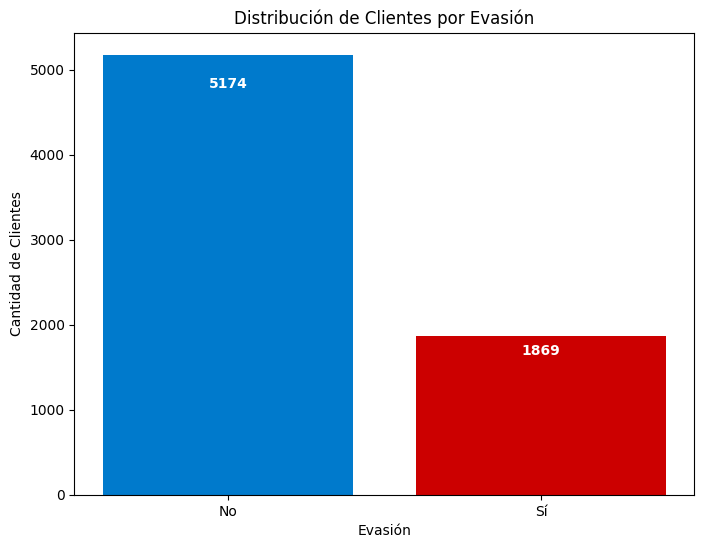

In [22]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt

# Calcular la distribución de la variable 'Evasion'
distribucion_evasion = df_final['Evasion'].value_counts()
print("Análisis de la Distribución de Evasión:")
print(distribucion_evasion)
print("\n" + "="*50 + "\n")

# Crear el gráfico de barras para visualizar la distribución
etiquetas = ['No', 'Sí']
valores = [distribucion_evasion.get(0, 0), distribucion_evasion.get(1, 0)]
plt.figure(figsize=(8, 6))
bars = plt.bar(etiquetas, valores, color=['#007ACC', '#CC0000'])
plt.title('Distribución de Clientes por Evasión')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Evasión')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval - (yval * 0.05), int(yval), va='top', ha='center', color='white', fontweight='bold')
plt.show()

#Recuento de evasión por variables categóricas

Descripción

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

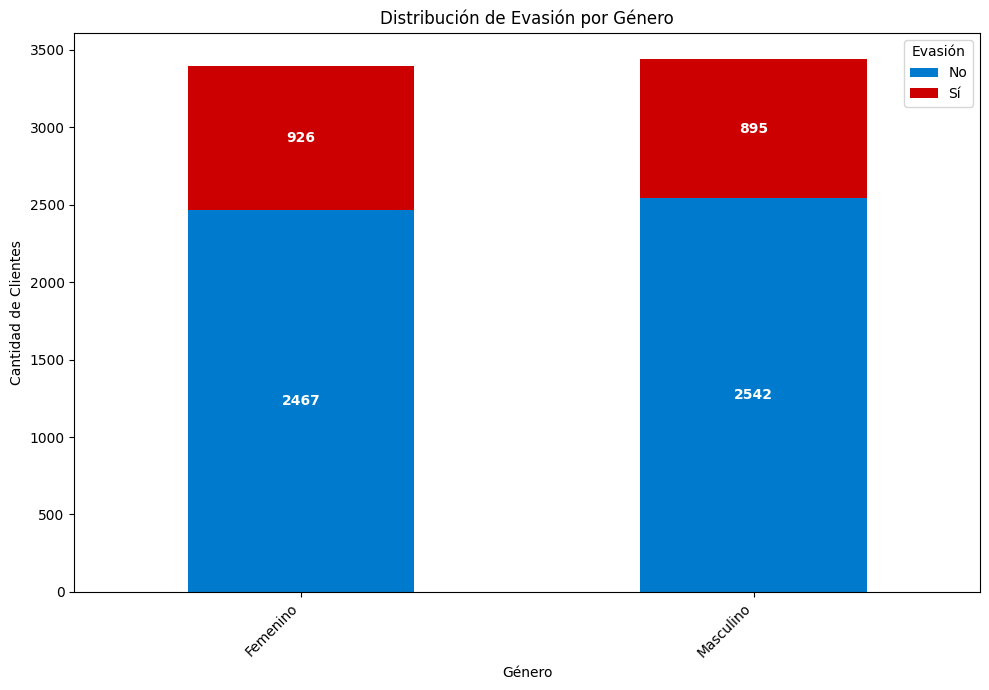

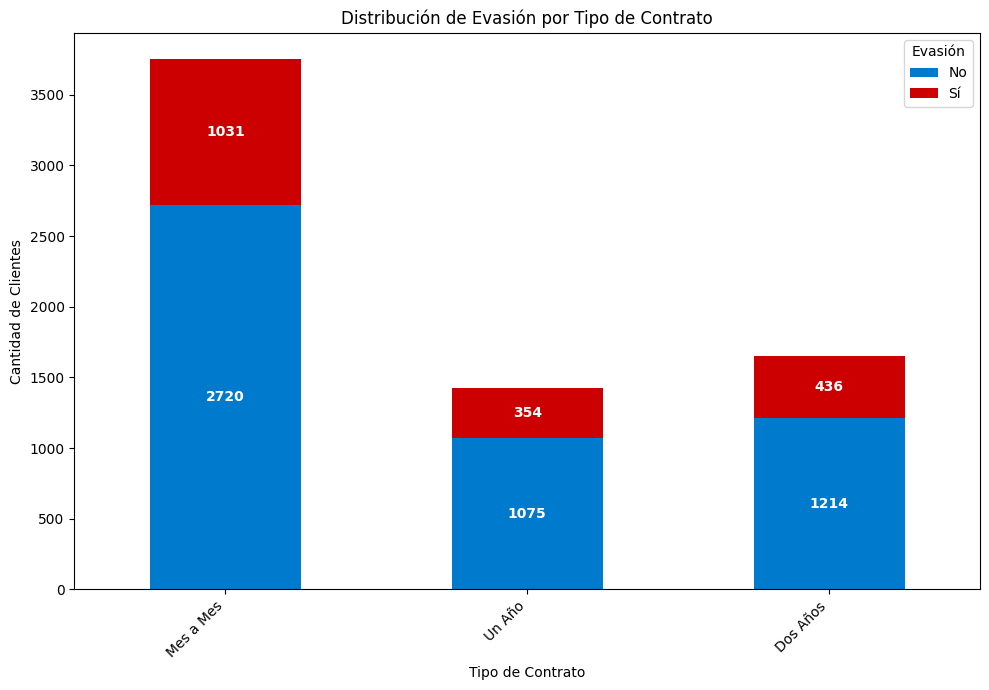

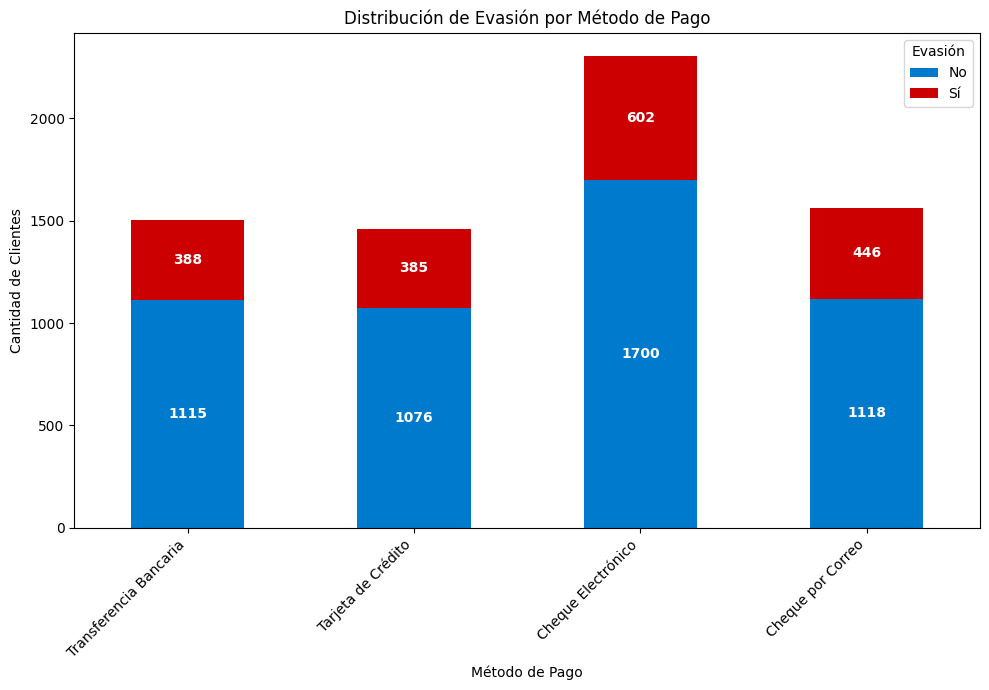

In [23]:

#---Análisis y Visualización de Evasión por Categoría---

# Lista de variables categóricas a analizar
traducciones = {
    'Female': 'Femenino',
    'Male': 'Masculino',
    'Month-to-month': 'Mes a Mes',
    'One year': 'Un Año',
    'Two year': 'Dos Años',
    'Electronic check': 'Cheque Electrónico',
    'Mailed check': 'Cheque por Correo',
    'Bank transfer (automatic)': 'Transferencia Bancaria',
    'Credit card (automatic)': 'Tarjeta de Crédito'
}
variables_a_analizar = ['gender', 'Contract', 'PaymentMethod']
nombres_en_espanol = ['Género', 'Tipo de Contrato', 'Método de Pago']

# Nombres en español para los títulos de los gráficos
nombres_en_espanol = ['Género', 'Tipo de Contrato', 'Método de Pago']

# Desarrollo del gráfico
for i, variable in enumerate(variables_a_analizar):

    # Crear una tabla de contingencia (crosstab)
    crosstab = pd.crosstab(df_final[variable], df_final['Evasion'])

    # Traducir el índice del crosstab (las etiquetas del eje X)
    crosstab.rename(index=traducciones, inplace=True)

    # Crear el gráfico de barras apilado
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#007ACC', '#CC0000'])

    # Añadir el número sobre cada segmento de la barra
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%d', color='white', fontweight='bold')

    # Configurar el gráfico
    plt.title(f'Distribución de Evasión por {nombres_en_espanol[i]}')
    plt.ylabel('Cantidad de Clientes')
    plt.xlabel(nombres_en_espanol[i])
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Evasión', labels=['No', 'Sí'])

    # Ajustar el layout y mostrar el gráfico
    plt.tight_layout()
    plt.show()

##Conteo de evasión por variables numéricas

Descripción

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [24]:
# Importar las librerías necesarias
import seaborn as sns

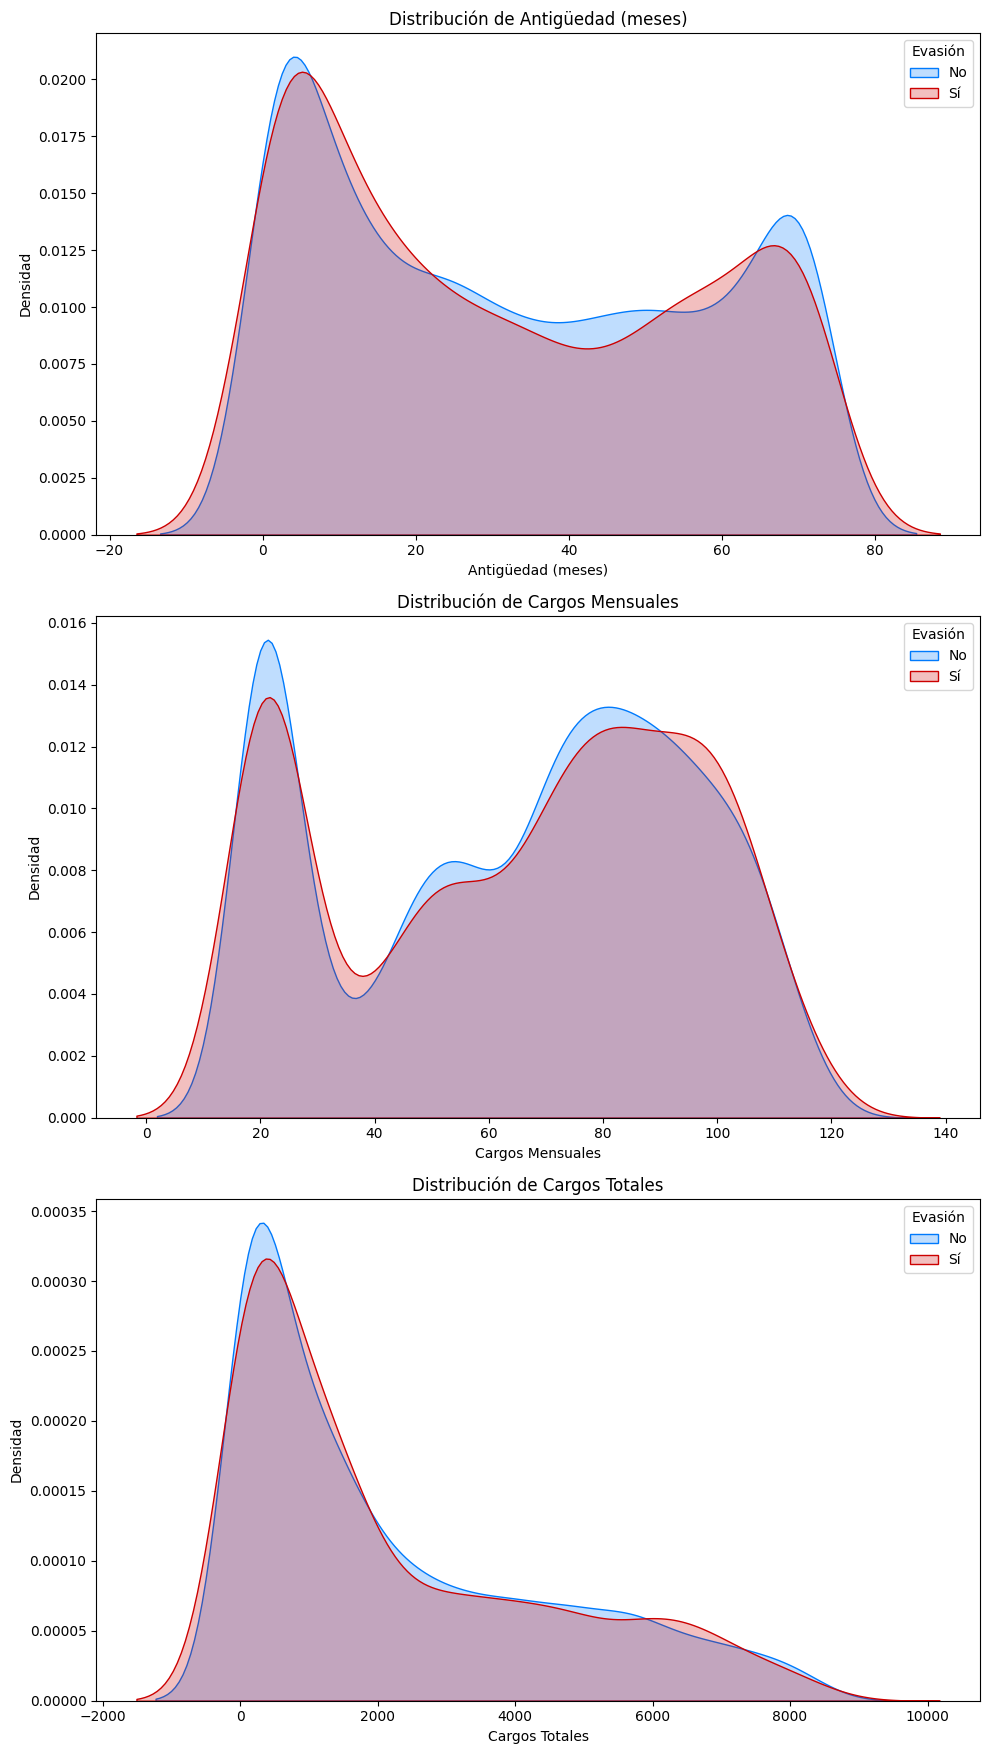

In [27]:
#---Corrección de Tipos de Datos Numéricos---

# La columna 'Charges.Total' puede contener espacios y necesita ser convertida a numérica
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)

#---Análisis y Visualización de Evasión por Variable Numérica---

# Lista de variables numéricas a analizar
variables_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Nombres en español para los títulos de los gráficos
nombres_en_espanol_num = ['Antigüedad (meses)', 'Cargos Mensuales', 'Cargos Totales']

# Crear una figura con múltiples subplots para asegurar un tamaño consistente
fig, axes = plt.subplots(nrows=len(variables_numericas), ncols=1, figsize=(10, 6 * len(variables_numericas)))

# Desarrollo del gráfico
for i, variable in enumerate(variables_numericas):

    # Seleccionar el subplot (ax) correspondiente para cada gráfico
    ax = axes[i]

    # Graficar la distribución para clientes que no hicieron evasión (Evasion = 0)
    sns.kdeplot(df_final[df_final['Evasion'] == 0][variable], label='No', fill=True, color='#007AFC', ax=ax)

    # Graficar la distribución para clientes que sí hicieron evasión (Evasion = 1)
    sns.kdeplot(df_final[df_final['Evasion'] == 1][variable], label='Sí', fill=True, color='#CC0000', ax=ax)

    # Configurar el gráfico
    ax.set_title(f'Distribución de {nombres_en_espanol_num[i]}')
    ax.set_xlabel(nombres_en_espanol_num[i])
    ax.set_ylabel('Densidad')
    ax.legend(title='Evasión')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

#📄Informe final

#Informe final

Descripción

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

- Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

- Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

- Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

- Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

- Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

## Introducción

### Objetivo del Análisis

El presente informe detalla el análisis realizado sobre los datos de clientes de Telecom X, una empresa de telecomunicaciones ficticia en América Latina. El objetivo principal es identificar los factores clave que influyen en la evasión de clientes (churn) y, a partir de estos hallazgos, proponer estrategias de retención efectivas.

### El Problema de la Evasión de Clientes (Churn)

La evasión de clientes es una métrica crítica en la industria de las telecomunicaciones, un mercado altamente competitivo donde la retención de clientes es fundamental para la rentabilidad. La pérdida de clientes no solo implica una disminución en los ingresos recurrentes, sino también un aumento en los costos asociados con la adquisición de nuevos clientes. Comprender por qué y cuándo los clientes deciden cancelar sus servicios es el primer paso para desarrollar programas de lealtad y estrategias proactivas que mejoren la satisfacción y fomenten relaciones a largo plazo.

Este análisis exploratorio de datos (EDA) sienta las bases para futuras iniciativas, como la construcción de modelos de aprendizaje automático capaces de predecir qué clientes tienen un alto riesgo de abandonar la compañía.

## Limpieza y Tratamiento de Datos

## 📌 Extracción

En esta fase inicial, el objetivo fue obtener los datos de los clientes de Telecom X. La fuente de datos fue una API que proporcionaba la información en formato JSON.

### Carga de Datos desde la API

Se utilizaron las bibliotecas de Python, específicamente `pandas`, para conectarse a la API y cargar los datos directamente en un DataFrame. Este método es eficiente y permite una transición fluida del formato JSON a una estructura tabular para el análisi

## 🔧 Transformación

Una vez extraídos los datos, la siguiente etapa crucial fue la transformación, que implicó comprender la estructura de los datos, limpiar las inconsistencias y prepararlos para el análisis.

### Conocimiento del Conjunto de Datos

Se exploraron las columnas para entender su contenido y tipo de datos

### Comprobación y Manejo de Incoherencias

Se llevó a cabo una revisión exhaustiva para garantizar la calidad de los datos:
* **Valores Ausentes:** No se encontraron valores nulos en el conjunto de datos.
  * **Valores Duplicados:** No se detectaron filas duplicadas basadas en el `customerID` y `Churn`.
  * **Errores de Formato:** La verificación inicial de tipos de datos no reveló errores obvios de formato, aunque los detalles dentro de los datos anidados se abordaron después de la normalización.
  * **Inconsistencias en Categorías:** Se descubrió que la columna `Churn` contenía valores vacíos (''). Se identificaron **224 filas** con esta inconsistencia, que fueron eliminadas. El DataFrame resultante, `df_limpio`, quedó con **7043 filas**.

### Creación de Nuevas Variables y Normalización

* **Creación de la Columna `Cuentas_Diarias`:** Se calculó el costo diario dividiendo los cargos mensuales por 30.
  * **Estandarización de `Churn`:** La columna `Churn` se convirtió a un formato binario (`1` para 'Sí' y `0` para 'No').
  * **Renombramiento de Columnas:** Las columnas se renombraron al español para una mejor comprensión.
  * **Normalización de Datos Anidados:** Las columnas con datos anidados (`Cliente`, `Servicio_Internet`, `Cuenta`, etc.) se "descomprimieron" utilizando `pd.json_normalize`. Esto convirtió la información de los diccionarios en columnas individuales, creando un `df_final` listo para el análisis.


## Análisis Exploratorio de Datos

## 📊 Carga y Análisis

Con los datos limpios y transformados, se procedió a la fase de análisis exploratorio para descubrir patrones y obtener información sobre los factores que influyen en la evasión de clientes.

### Análisis Descriptivo

Se calcularon estadísticas descriptivas para las variables numéricas, lo que proporcionó una visión general de medidas como la media, la mediana y la desviación estándar. La tasa de evasión promedio en el conjunto de datos se situó en un **26.5%**.

### Distribución de Evasión

El análisis de la variable "Evasion" mostró un desbalance en los datos:

  * **Clientes que no cancelaron (No): 5174 (73.5%)
  * **Clientes que cancelaron (Sí): 1869 (26.5%)



### Recuento de Evasión por Variables Categóricas


Se analizaron varias variables categóricas para identificar perfiles de clientes con mayor propensión a la evasión:

  * **Género:** La tasa de evasión es prácticamente la misma para hombres y mujeres, lo que indica que el género no es un factor diferenciador.
  * **Tipo de Contrato:** Se observa una tasa de evasión marcadamente más alta en los clientes con contrato **"Mes a Mes"**, en comparación con los contratos anuales o bianuales.
  * **Método de Pago:** Los clientes que pagan con **"Cheque Electrónico"** tienen una tasa de evasión notablemente superior a los demás métodos de pago.


### Conteo de Evasión por Variables Numéricas

La distribución de las variables numéricas reveló diferencias significativas entre los clientes que se quedaron y los que se fueron:

  * **Antigüedad (tenure):** Los clientes que cancelaron tienden a tener una antigüedad mucho menor. La mayoría de las cancelaciones ocurren en los primeros meses de servicio.
  * **Cargos Mensuales:** Los clientes que cancelaron suelen tener cargos mensuales más altos.
  * **Cargos Totales:** Inversamente a los cargos mensuales, los clientes que cancelan tienden a tener cargos totales acumulados más bajos, lo cual está correlacionado con su menor antigüedad.

## Conclusiones e Insights

El análisis exploratorio de los datos de Telecom X ha revelado patrones claros y ha permitido identificar un perfil de cliente con alta probabilidad de evasión. A continuación, se resumen los principales hallazgos:

* **El Factor Contrato es Determinante:** El tipo de contrato es uno de los predictores más fuertes de la evasión. Los clientes con contratos de "Mes a Mes" son significativamente más propensos a cancelar el servicio. La falta de un compromiso a largo plazo los hace más susceptibles a las ofertas de la competencia y menos tolerantes a posibles insatisfacciones con el servicio.

  * **La Antigüedad como Indicador de Lealtad:** Existe una correlación negativa fuerte entre la antigüedad del cliente y la evasión. Los clientes nuevos, especialmente en sus primeros meses, representan el grupo de mayor riesgo.

  * **El Método de Pago Refleja el Compromiso:** El uso de "Cheque Electrónico" como método de pago se asocia con una tasa de churn considerablemente más alta.

  * **Sensibilidad al Precio en Cargos Mensuales:** Los clientes con cargos mensuales más elevados tienen una mayor tendencia a cancelar. Esto es particularmente visible en aquellos que contratan múltiples servicios de internet, lo que sugiere que, si bien la venta de servicios adicionales aumenta los ingresos por cliente, también puede incrementar el riesgo de evasión si el valor percibido no justifica el costo.



## Recomendaciones:

 **Fomentar la Adopción de Contratos a Largo Plazo:**

   **Acción:** Diseñar campañas de marketing y ofertas especiales que incentiven a los clientes nuevos y existentes con contratos de "Mes a Mes" a migrar a planes de "Un Año" o "Dos Años".
      


**Programa de Bienvenida  Nuevos Clientes:**

 **Acción:** Implementar un programa de "onboarding" robusto durante los primeros tres meses de servicio. Esto podría incluir llamadas de bienvenida, tutoriales, y ofertas exclusivas para mejorar la experiencia inicial.
    


**Optimización de Métodos de Pago:**

**Acción:** Ofrecer pequeños descuentos o beneficios (como gigas adicionales o acceso a contenido premium) a los clientes que migren del pago con "Cheque Electrónico" a métodos de pago automáticos.

   **Estrategias de Venta Cruzada Inteligente:**

 **Acción:** En lugar de enfocarse únicamente en vender más servicios, analizar el perfil de consumo del cliente para ofrecer paquetes de servicios que maximicen el valor percibido sin aumentar drásticamente el costo mensual

 **Sistema de Alertas Tempranas:**

  **Acción:** Desarrollar un sistema que identifique a los clientes de alto riesgo basándose en los factores clave identificados (contrato mes a mes, poca antigüedad, cargos mensuales altos, pago con cheque electrónico).

In [30]:
df_final.to_csv('df_telecom.csv', index=False)